# Linear Regression Multivariate

### load boston house data

In [3]:
import pickle
import pandas as pd

with open('./boston_house.pkl', 'rb') as f:
    boston_house = pickle.load(f)

bh = pd.DataFrame(boston_house.data, columns = boston_house.feature_names)
bh['PRICE'] = boston_house.target

display(bh)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


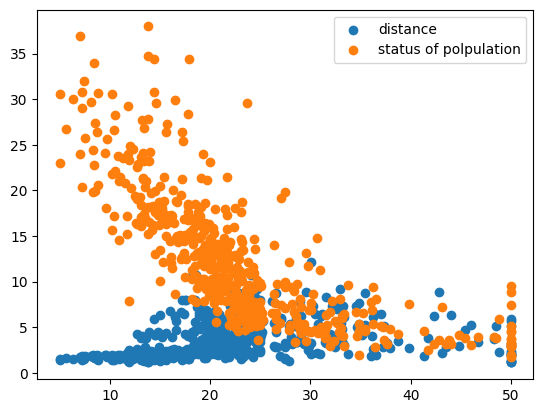

In [4]:
# check data set
import matplotlib.pyplot as plt

plt.scatter(bh['PRICE'], bh['DIS'], label = 'distance')
plt.scatter(bh['PRICE'], bh['LSTAT'], label = 'status of polpulation')
plt.legend()
plt.show()

### split dataset

In [6]:
# split data
from sklearn.model_selection import train_test_split

x = boston_house['data']
y = boston_house['target']

# IMPLEMENT HERE (random_state = 24)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

### pre-processing (z-score normalization)

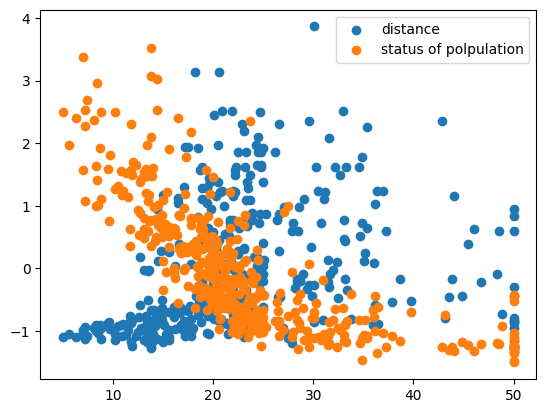

In [8]:
# standardization

# IMPLEMENT HERE
x_offset = x_train.mean(axis=0)
x_scale = x_train.std(axis=0)
y_offset = y_train.mean()

xm_train = (x_train - x_offset) / x_scale
xm_test = (x_test - x_offset) / x_scale

# show
bh = pd.DataFrame(xm_train, \
                  columns = boston_house.feature_names)
bh['PRICE']  = y_train
plt.scatter(bh['PRICE'], bh['DIS'], label = 'distance')
plt.scatter(bh['PRICE'], bh['LSTAT'], label = 'status of polpulation')
plt.legend()
plt.show()

### linear regression (using LinearRegression of scikit-learn )

MSE: 23.67


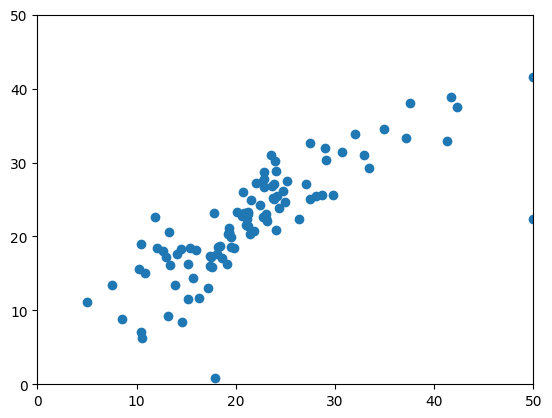

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# IMPLEMENT HERE (use LinearRegression)
model = LinearRegression()
model.fit(xm_train, y_train)
y_pred_test = model.predict(xm_test)

# IMPLEMENT HERE
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE: {mse_test:.2f}')

plt.scatter(y_test, y_pred_test)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()

### linear regression (using optimize of scikit-learn )

In [12]:
import numpy as np
from scipy.optimize import minimize

def linear_regression(params, X, y):
    W = params[:-1]
    b = params[-1]

    # IMPLEMENT HERE
    y_pred = X @ W + b
    mse = ((y - y_pred)**2).mean()
    return mse

# IMPLEMENT HERE
initial_guess = np.zeros(xm_train.shape[1] + 1)
result = minimize(linear_regression, initial_guess, args=(xm_train, y_train))
print(result)

W_opt, b_opt = result.x[:-1], result.x[-1]

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 21.748722856941374
        x: [-3.950e-01  1.020e+00 ... -3.632e+00  2.272e+01]
      nit: 20
      jac: [-2.384e-07  9.537e-07 ... -3.338e-06  1.192e-06]
 hess_inv: [[ 1.018e+00 -7.612e-02 ... -1.869e-01  1.919e-03]
            [-7.612e-02  1.092e+00 ... -1.178e-01 -1.057e-02]
            ...
            [-1.869e-01 -1.178e-01 ...  1.206e+00  3.135e-02]
            [ 1.919e-03 -1.057e-02 ...  3.135e-02  5.087e-01]]
     nfev: 345
     njev: 23


MSE: 23.674481577650777


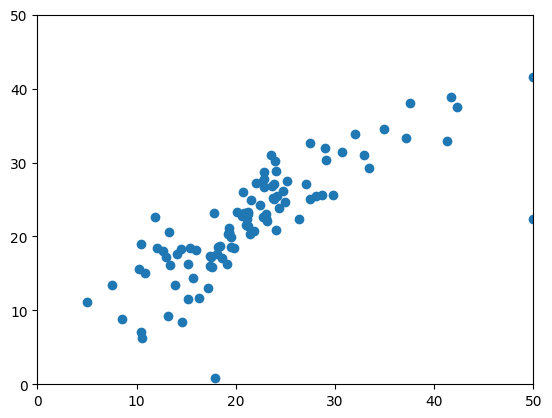

In [13]:
# Test data set
# IMPLEMENT HERE
y_pred_test = xm_test @ W_opt + b_opt
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE: {mse_test}')

# graph
plt.scatter(y_test, y_pred_test)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()